<a href="https://colab.research.google.com/github/andyz2021/Lung-Cancer-Classification/blob/master/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Make sure your starting directory is empty
%cd ..

/


#Import packages and read data

In [3]:
engine='python'
print("done")
import pandas as pd
from os import listdir
from os.path import isfile, join
import scipy as sp
import numpy as np
import pandas as pd
import PIL
import scipy.ndimage as spi
import matplotlib.pyplot as plt
%matplotlib inline
print("done")
df = pd.read_csv('/content/drive/My Drive/LungCancerData/NSCLC.csv')
#df=df[::2]
df.to_csv("/content/drive/My Drive/LungCancerData/NSCLC.csv", header=["File path", "Subtype"], index=False)
rows_we_want = [row for i,row in enumerate(df.index) if not i % 2]
#odd_rows =[row for i,row in enumerate(df.index) if  i % 2]
df_new = df.loc[rows_we_want]
#df_odd= df.loc[odd_rows]
display(df)
display(df_new)
#display(df_odd)

done
done


,File path,Subtype
0,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
1,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
2,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
3,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
4,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
...,...,...
37901,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
37902,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
37903,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
37904,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma


,File path,Subtype
0,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
2,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
4,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
6,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
8,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
...,...,...
37896,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
37898,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
37900,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
37902,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma


In [4]:
# shuffles data
np.random.seed(20)
df_new = df_new.sample(frac=1) 
#df_odd=df_odd.sample(frac=1)
display(df_new)
#display(df_odd)

,File path,Subtype
18524,/content/drive/My Drive/LungCancerData/LungCan...,Adenocarcinoma
16330,/content/drive/My Drive/LungCancerData/LungCan...,Adenocarcinoma
3142,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
37320,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
3936,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
...,...,...
3214,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
7830,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell
29458,/content/drive/My Drive/LungCancerData/LungCan...,Squamous Cell Carcinoma
8734,/content/drive/My Drive/LungCancerData/LungCan...,Large Cell


#Split and load data

In [5]:
#Split into train, validation and test in a ratio of 70% 15% 15%, respectively
test = df_new[:3600]
val = df_new[3600:5400]
train = df_new[5400:] 

train_labels = train[0:3000]
train_target_labels = train_labels["Subtype"]
val_labels = val
val_target_labels = val_labels["Subtype"]


In [ ]:

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

# load train dataset
train_data = np.array([img_to_array(load_img(img, target_size=(299, 299)))
                           for img in train_labels['File path'].values.tolist()
                      ]).astype('float32')
x_train = train_data
y_train = train_target_labels

# load val dataset
val_data = np.array([img_to_array(load_img(img, target_size=(299, 299)))
                           for img in val_labels['File path'].values.tolist()
                      ]).astype('float32')

x_val = val_data
y_val = val_target_labels

print('Train and Validation Datasets Size:', x_train.shape, x_val.shape)

Train and Validation Datasets Size: (3000, 299, 299, 3) (1800, 299, 299, 3)


#One hot encoding

In [ ]:
import numpy as np
import pandas as pd
y_train_ohe = np.matrix(pd.get_dummies(y_train.reset_index(drop=True)))
y_val_ohe = np.matrix(pd.get_dummies(y_val.reset_index(drop=True)))
y_train_ohe.shape, y_val_ohe.shape

((3000, 3), (1800, 3))

#Data generation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32

# Create train generator.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(x_train, y_train_ohe, shuffle=False, 
                                     batch_size=BATCH_SIZE, seed=1)
                     
# Create validation generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow(x_val, y_val_ohe, shuffle=False, 
                                   batch_size=BATCH_SIZE, seed=1) 

#Import model

In [ ]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.models import load_model

loaded_model=load_model('/content/drive/My Drive/LungCancerData/model00070_0.843324_0.587834.h5')
loaded_model.layers.pop()
#Import Inception V3
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(299, 299, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = y_train_ohe.shape[1]
predictions = Dense(total_classes, activation='softmax')(out)
loaded_model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
# for layer in base_inception.layers:
#     layer.trainable = False
    
# Compile 
loaded_model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 
loaded_model.summary()


87916544/87910968 [==============================] - 3s 0us/step


NameError: ignored

#Test run

In [ ]:
# Train the model
#import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size


checkpoint = [keras.callbacks.ModelCheckpoint('content/drive/My Drive/LungCancerData/Model Checkpoints/model{epoch:03d}_{val_accuracy:05f}_{val_loss:05f}.hdf5', period=5)]

history = loaded_model.fit(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=20, verbose=1, callbacks=checkpoint)

Epoch 1/20
93/93 [==============================] - 184s 2s/step - loss: 0.1191 - accuracy: 0.9528 - val_loss: 1.2495 - val_accuracy: 0.6468
Epoch 2/20
93/93 [==============================] - 188s 2s/step - loss: 0.1069 - accuracy: 0.9552 - val_loss: 1.4682 - val_accuracy: 0.6680
Epoch 3/20
93/93 [==============================] - 187s 2s/step - loss: 0.1219 - accuracy: 0.9569 - val_loss: 1.1290 - val_accuracy: 0.6793
Epoch 4/20
93/93 [==============================] - 187s 2s/step - loss: 0.0812 - accuracy: 0.9737 - val_loss: 1.2131 - val_accuracy: 0.6046
Epoch 5/20
93/93 [==============================] - 187s 2s/step - loss: 0.1253 - accuracy: 0.9538 - val_loss: 1.9612 - val_accuracy: 0.6482
Epoch 6/20
93/93 [==============================] - 187s 2s/step - loss: 0.0877 - accuracy: 0.9690 - val_loss: 1.3249 - val_accuracy: 0.6963
Epoch 7/20
93/93 [==============================] - 186s 2s/step - loss: 0.0803 - accuracy: 0.9710 - val_loss: 2.5723 - val_accuracy: 0.6736
Epoch 8/20
93

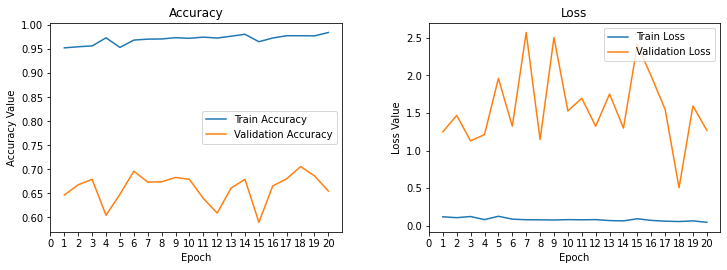

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 21, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig("plot1.png")

#Batch 1

In [ ]:
# Train the model
#import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

#Images 3000-6000
model_1=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model010_0.679299_1.527921.hdf5')


checkpoint = [keras.callbacks.ModelCheckpoint('content/drive/My Drive/LungCancerData/Model Checkpoints/model{epoch:03d}_{val_accuracy:05f}_{val_loss:05f}.hdf5', period=5)]

history = model_1.fit(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=50, verbose=1, callbacks=checkpoint)

Epoch 1/50
93/93 [==============================] - 217s 2s/step - loss: 0.7946 - accuracy: 0.6914 - val_loss: 0.8428 - val_accuracy: 0.6629
Epoch 2/50
93/93 [==============================] - 187s 2s/step - loss: 0.4955 - accuracy: 0.7975 - val_loss: 0.5960 - val_accuracy: 0.7353
Epoch 3/50
93/93 [==============================] - 187s 2s/step - loss: 0.3716 - accuracy: 0.8551 - val_loss: 0.6768 - val_accuracy: 0.7138
Epoch 4/50
93/93 [==============================] - 187s 2s/step - loss: 0.3004 - accuracy: 0.8790 - val_loss: 0.5848 - val_accuracy: 0.6997
Epoch 5/50
93/93 [==============================] - 187s 2s/step - loss: 0.2429 - accuracy: 0.9121 - val_loss: 0.7783 - val_accuracy: 0.7019
Epoch 6/50
93/93 [==============================] - 187s 2s/step - loss: 0.2099 - accuracy: 0.9252 - val_loss: 0.6398 - val_accuracy: 0.7460
Epoch 7/50
93/93 [==============================] - 186s 2s/step - loss: 0.1829 - accuracy: 0.9330 - val_loss: 0.9331 - val_accuracy: 0.7675
Epoch 8/50
93

In [ ]:
hist_r1_df = pd.DataFrame(history.history) 
hist_r1_df.to_csv(r'/content/drive/My Drive/LungCancerData/Model Checkpoints/History round 1.csv', index = False)

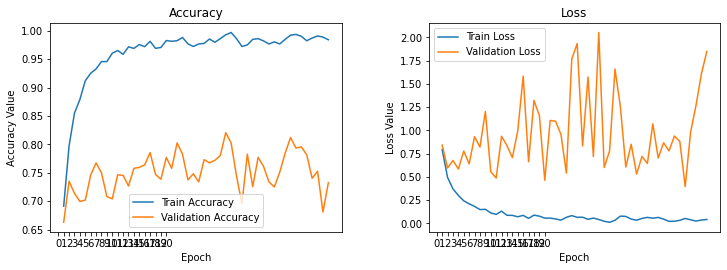

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 21, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig("plot1.png")

#Batch 2

In [ ]:
# Train the model
#import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

#Images 6000-9000
model_2=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model045_0.795814_0.881224.hdf5')


checkpoint = [keras.callbacks.ModelCheckpoint('content/drive/My Drive/LungCancerData/Model Checkpoints/model_2{epoch:03d}_{val_accuracy:05f}_{val_loss:05f}.hdf5', period=5)]

history = model_2.fit(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=50, verbose=1, callbacks=checkpoint)

Epoch 1/50
93/93 [==============================] - 140s 2s/step - loss: 0.6297 - accuracy: 0.7668 - val_loss: 0.4090 - val_accuracy: 0.7757
Epoch 2/50
93/93 [==============================] - 109s 1s/step - loss: 0.3394 - accuracy: 0.8706 - val_loss: 0.9351 - val_accuracy: 0.7443
Epoch 3/50
93/93 [==============================] - 108s 1s/step - loss: 0.2380 - accuracy: 0.9107 - val_loss: 0.5945 - val_accuracy: 0.8122
Epoch 4/50
93/93 [==============================] - 108s 1s/step - loss: 0.1983 - accuracy: 0.9235 - val_loss: 0.5446 - val_accuracy: 0.7919
Epoch 5/50
93/93 [==============================] - 108s 1s/step - loss: 0.1388 - accuracy: 0.9515 - val_loss: 0.7160 - val_accuracy: 0.8331
Epoch 6/50
93/93 [==============================] - 108s 1s/step - loss: 0.1224 - accuracy: 0.9555 - val_loss: 0.6905 - val_accuracy: 0.8133
Epoch 7/50
93/93 [==============================] - 108s 1s/step - loss: 0.1056 - accuracy: 0.9592 - val_loss: 0.8156 - val_accuracy: 0.8003
Epoch 8/50
93

# Batch 3

In [ ]:
import pandas as pd
hist_r2_df = pd.DataFrame(history.history) 
hist_r2_df.to_csv(r'/content/drive/My Drive/LungCancerData/Model Checkpoints/History round 2.csv', index = False)

NameError: ignored

In [ ]:
# Train the model
#import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

#Images 9000-12000
model_3=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model_2045_0.850679_0.576774.hdf5')


checkpoint = [keras.callbacks.ModelCheckpoint('content/drive/My Drive/LungCancerData/Model Checkpoints/model_3{epoch:03d}_{val_accuracy:05f}_{val_loss:05f}.hdf5', period=5)]


history = model_3.fit(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=50, verbose=1, callbacks=checkpoint)

Epoch 1/50
93/93 [==============================] - 231s 2s/step - loss: 0.5049 - accuracy: 0.8187 - val_loss: 0.3062 - val_accuracy: 0.8220
Epoch 2/50
93/93 [==============================] - 185s 2s/step - loss: 0.2490 - accuracy: 0.9124 - val_loss: 0.1475 - val_accuracy: 0.8688
Epoch 3/50
93/93 [==============================] - 184s 2s/step - loss: 0.1521 - accuracy: 0.9434 - val_loss: 0.3332 - val_accuracy: 0.8360
Epoch 4/50
93/93 [==============================] - 183s 2s/step - loss: 0.1450 - accuracy: 0.9488 - val_loss: 0.1669 - val_accuracy: 0.8558
Epoch 5/50
93/93 [==============================] - 183s 2s/step - loss: 0.0982 - accuracy: 0.9653 - val_loss: 0.4264 - val_accuracy: 0.8535
Epoch 6/50
93/93 [==============================] - 183s 2s/step - loss: 0.0822 - accuracy: 0.9718 - val_loss: 0.3006 - val_accuracy: 0.8710
Epoch 7/50
93/93 [==============================] - 182s 2s/step - loss: 0.0759 - accuracy: 0.9750 - val_loss: 0.3652 - val_accuracy: 0.7907
Epoch 8/50
93

In [ ]:
hist_r3_df = pd.DataFrame(history.history) 
hist_r3_df.to_csv(r'/content/drive/My Drive/LungCancerData/Model Checkpoints/History round 3.csv', index = False)

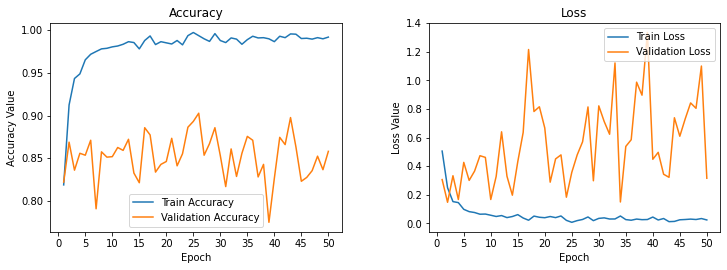

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig("plot1.png")

#Batch 4

In [ ]:

# Train the model
#import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

#Images 0-3000
model_4=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model_3025_0.893100_0.356721.hdf5')


checkpoint = [keras.callbacks.ModelCheckpoint('content/drive/My Drive/LungCancerData/Model Checkpoints/model_4{epoch:03d}_{val_accuracy:05f}_{val_loss:05f}.hdf5', period=5)]


history = model_4.fit(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=50, verbose=1, callbacks=checkpoint)

Epoch 1/50
93/93 [==============================] - 211s 2s/step - loss: 0.3408 - accuracy: 0.8794 - val_loss: 0.2416 - val_accuracy: 0.8465
Epoch 2/50
93/93 [==============================] - 183s 2s/step - loss: 0.1337 - accuracy: 0.9471 - val_loss: 0.1606 - val_accuracy: 0.8840
Epoch 3/50
93/93 [==============================] - 183s 2s/step - loss: 0.0804 - accuracy: 0.9727 - val_loss: 1.0080 - val_accuracy: 0.7658
Epoch 4/50
93/93 [==============================] - 183s 2s/step - loss: 0.0634 - accuracy: 0.9768 - val_loss: 0.3755 - val_accuracy: 0.8829
Epoch 5/50
93/93 [==============================] - 182s 2s/step - loss: 0.0575 - accuracy: 0.9811 - val_loss: 0.4755 - val_accuracy: 0.8722
Epoch 6/50
93/93 [==============================] - 182s 2s/step - loss: 0.0494 - accuracy: 0.9825 - val_loss: 0.6759 - val_accuracy: 0.8790
Epoch 7/50
93/93 [==============================] - 182s 2s/step - loss: 0.0412 - accuracy: 0.9855 - val_loss: 0.3114 - val_accuracy: 0.8818
Epoch 8/50
93

In [ ]:
hist_r4_df = pd.DataFrame(history.history) 
hist_r4_df.to_csv(r'/content/drive/My Drive/LungCancerData/Model Checkpoints/History round 4.csv', index = False)

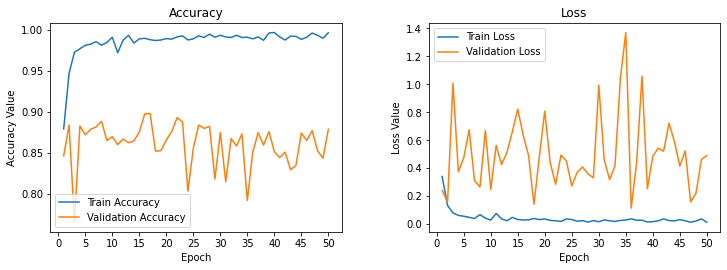

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig("plot1.png")

#Evaluating the model

In [6]:
#Loading in test dataset
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img
test_labels=test
test_target_labels=test_labels["Subtype"]

test_data = np.array([img_to_array(load_img(img, target_size=(299, 299)))
                           for img in test_labels['File path'].values.tolist()
                      ]).astype('float32')
x_test = test_data
y_test = test_target_labels






print('Test Datasets Size:', x_test.shape)

Using TensorFlow backend.


Test Datasets Size: (3600, 299, 299, 3)


In [7]:
import numpy as np
import pandas as pd

#One hot encoding
y_test_ohe = np.matrix(pd.get_dummies(y_test.reset_index(drop=True)))

In [8]:
#Data generation
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow(x_test, y_test_ohe, shuffle=False, 
                                   batch_size=BATCH_SIZE, seed=1) 

In [9]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.models import load_model

loaded_model=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model_3010_0.851810_0.167065.hdf5')
loaded_model.layers.pop()
#Import Inception V3
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(299, 299, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = y_test_ohe.shape[1]
predictions = Dense(total_classes, activation='softmax')(out)
loaded_model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
# for layer in base_inception.layers:
#     layer.trainable = False
    
# Compile 
loaded_model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 
loaded_model.summary()


87916544/87910968 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
___________________________

In [10]:
#Test the model
import keras
from keras.callbacks import ModelCheckpoint
batch_size = BATCH_SIZE


model_test=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model_3010_0.851810_0.167065.hdf5')


checkpoint = [keras.callbacks.ModelCheckpoint('content/drive/My Drive/LungCancerData/Model Checkpoints/model_test{epoch:03d}_{test_accuracy:05f}_{test_loss:05f}.hdf5', period=5)]


history = model_test.evaluate(test_generator, verbose=1, callbacks=checkpoint)
print(history)

113/113 [==============================] - 33s 292ms/step
[0.1987462043762207, 0.7749999761581421]


In [11]:
predictions=model_test.predict(test_generator)

In [ ]:
model_test.metrics_names

['loss', 'accuracy']

In [29]:
from sklearn import metrics
print(metrics.confusion_matrix(np.argmax(y_test_ohe, axis=1), np.argmax(predictions,axis=1)))
#metrics.accuracy_score(np.argmax(y_test_ohe, axis=1), np.argmax(predictions,axis=1))
#metrics.roc(np.argmax(y_test_odd_ohe, axis=1), np.argmax(predictions,axis=1))
#import sklearn
#sklearn.metrics.precision_score(np.argmax(y_test_ohe, axis=1), np.argmax(predictions,axis=1), average='macro')
#sklearn.metrics.recall_score(np.argmax(y_test_ohe, axis=1), np.argmax(predictions,axis=1), average='macro')
#sklearn.metrics.f1_score(np.argmax(y_test_ohe, axis=1), np.argmax(predictions,axis=1), average='weighted')

[[ 292  150  134]
 [  19 1004  227]
 [  27  253 1494]]


Sensitivity for class 1: 0.5
Specificity for class 1: 0.98
Sensitivity for class 2: 0.8
Specificity for class 2: 0.83
Sensitivity for class 3: 0.84
Specificity for class 3: 0.80

#AUC-ROC

In [ ]:
print(y_test_ohe.argmax(axis=1).shape)
print(y_test_ohe.argmax(axis=1).shape)
print(y_test_ohe[0:5])
print(predictions[0])

(3600, 1)
(3600, 1)
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
[1.0961950e-03 8.4590036e-05 9.9881917e-01]


In [ ]:
fpr, tpr, thresholds = roc_curve(np.argmax(y_test_ohe, axis=1), np.argmax(predictions,axis=1))

ValueError: ignored

One-vs-One ROC AUC scores:
0.896082 (macro),
0.897371 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.896082 (macro),
0.897371 (weighted by prevalence)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


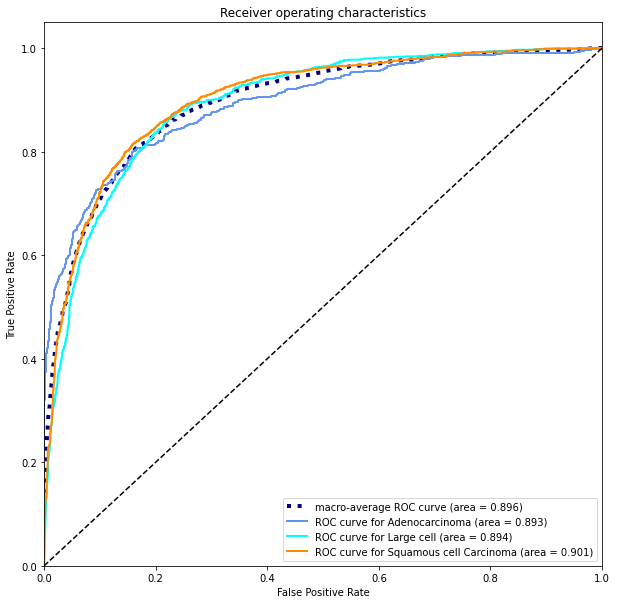

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score



macro_roc_auc_ovo = roc_auc_score(y_test_ohe, predictions, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test_ohe, predictions, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test_ohe, predictions, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test_ohe, predictions, multi_class="ovr",
                                     average="weighted")
micro_roc_auc_ovo = roc_auc_score(y_test_ohe, predictions, multi_class="ovo",
                                  average="micro")
micro_roc_auc_ovr = roc_auc_score(y_test_ohe, predictions, multi_class="ovr",
                                  average="micro")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


# Plot all ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes


fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test_ohe.reshape(-1), predictions.reshape(-1))
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
#plt.plot(fpr["micro"], tpr["micro"],
 #        label='micro-average ROC curve (area = {0:0.2f})'
  #             ''.format(micro_roc_auc_ovo),
   #      color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
# Plot of a ROC curve for a specific class
classes=["Adenocarcinoma", "Large cell", "Squamous cell Carcinoma"]
i=0
for name, color in zip(classes, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve for {0} (area = {1:0.3f})'
             ''.format(name, roc_auc[i]))
    i=i+1
    
#for i in range(n_classes):
 #   plt.figure()
  #  plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# Confidence interval

In [ ]:
#95% confidence interval of accuracy is 77.4% +/- 1.36%
#95% confidence interval of loss is 19.9% +/- 1.3%
acc=0.7749999761581421
from math import sqrt
loss=0.1987452507019043
interval_l=1.96*sqrt((loss*(1-loss))/3600)
interval_a=1.96*sqrt((acc*(1-acc))/3600)
print(interval_l)
print(interval_a)

0.013035824621861522
0.013641023201836829


In [ ]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

#Gradcam(not working)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm


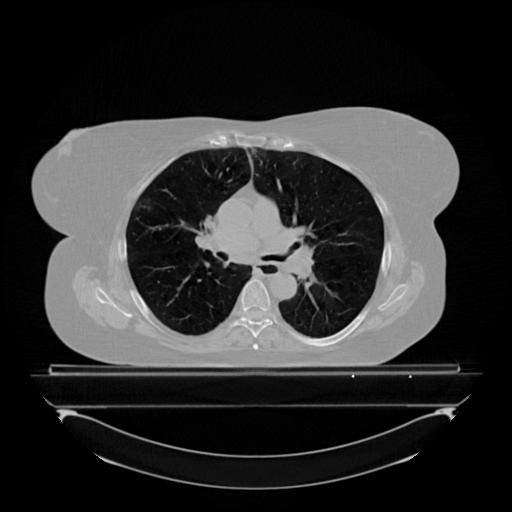

In [ ]:
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

model_builder=load_model('/content/drive/My Drive/LungCancerData/Model Checkpoints/model_3010_0.851810_0.167065.hdf5')
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "global_average_pooling2d_1"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
img_path = "/content/drive/My Drive/LungCancerData/LungCancer/Large Cell/LUNG1-298/png/LUNG1-298output-slice55.jpg"

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
#model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model_builder.predict(img_array)
print("Predicted:")
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model_builder, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Predicted:
[[4.0672376e-06 1.1545801e-07 9.9999583e-01]]


AttributeError: ignored